# Analysis of Chicago Parking Tickets Data - 1

## Result Figure 1: Visualize the Decreasing Trend of Issued Expired Meter Tickets (Due to ParkChicago App)

![image.png](./Fig1.png)

## Code for getting the result

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geocoder
import requests

## 1) Prepare the data
Prepare the data by years: run the python file __proj_2_pre.py__ to parse the City of Chicago Parking Ticket data accoding to concerned years.

First need to download the City of Chicago Parking Ticket data from https://www.propublica.org/datastore/dataset/chicago-parking-ticket-data

In [5]:
# Parse the recent 5 years history from the raw data
year_vec = ['2012','2013','2014','2015','2016','2017']
numTickets = pd.DataFrame(columns = ['time', 'number'])

In [6]:
k = 0
for i in range(len(year_vec)):
#year = '2010'
    year = year_vec[i]

    filename_c = 'issue_' + year + '.csv'
    #filename_c = 'issue_2018.csv'
    data = pd.read_csv(filename_c, sep=',') 
    
    data = data[~data.violation_description.str.contains("EXPIRED PLATE OR TEMPORARY REGISTRATION")]
    
    violations = data['violation_description']
    vio_cont = violations.value_counts()
    
    
    vio_meter = vio_cont['EXP. METER NON-CENTRAL BUSINESS DISTRICT'] +\
                vio_cont['EXPIRED METER CENTRAL BUSINESS DISTRICT']
                
    vio_total = len(violations)
    
    vioRate_meter = vio_meter/ vio_total
    
    print('Meter violation rate = ' + str(vioRate_meter))
    
    # put expired meters violation in a dataframe
    searchfor = ['EXP. METER NON-CENTRAL BUSINESS DISTRICT',
                 'EXPIRED METER CENTRAL BUSINESS DISTRICT']
    meters = data[data.violation_description.str.contains('|'.join(searchfor))]
    
    
    
    ### see data by months
    
    vio_months = []
    for i in range(1, 13):
        if i < 10:
            month = ('0'+str(i))
        else:
            month = (str(i)) 
            
        time_str = year +'-'+ month  
        
        
        #data_tmp = full_df.loc[full_df.issue_date.str.contains(time_str)]
        data_tmp = meters.loc[meters.issue_date.str.contains(time_str)]
        
        vio_months.append([time_str, data_tmp])
        print(time_str, len(data_tmp))
        
    # calculate tickets number by months
    #numTickets = []    
    for i in range(len(vio_months)):
        num = len(vio_months[i][1])
        time_str = vio_months[i][0]
        #numTickets.append([time_str, num])
        item = [time_str, num]
        
        k += 1
        numTickets.loc[k] = item





/home/xma/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Meter violation rate = 0.17625227733226137
2012-01 12
2012-02 6933
2012-03 44138
2012-04 39621
2012-05 36350
2012-06 43331
2012-07 40396
2012-08 44021
2012-09 38991
2012-10 42921
2012-11 43392
2012-12 42563
Meter violation rate = 0.18305806173816982
2013-01 39198
2013-02 31436
2013-03 43800
2013-04 39637
2013-05 39683
2013-06 33296
2013-07 40158
2013-08 39509
2013-09 35634
2013-10 41535
2013-11 41532
2013-12 41385


/home/xma/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Meter violation rate = 0.1606539376001994
2014-01 36037
2014-02 35555
2014-03 48334
2014-04 42593
2014-05 37784
2014-06 28408
2014-07 24223
2014-08 22607
2014-09 24421
2014-10 30449
2014-11 25476
2014-12 28314
Meter violation rate = 0.16515805429332875
2015-01 30343
2015-02 22616
2015-03 35703
2015-04 35292
2015-05 34119
2015-06 31836
2015-07 34301
2015-08 32327
2015-09 33193
2015-10 36106
2015-11 35292
2015-12 34065
Meter violation rate = 0.16373386731160453
2016-01 30669
2016-02 30329
2016-03 34517
2016-04 29099
2016-05 29249
2016-06 29569
2016-07 28326
2016-08 30212
2016-09 29234
2016-10 31070
2016-11 35506
2016-12 31321
Meter violation rate = 0.18224380110437283
2017-01 33225
2017-02 31533
2017-03 34988
2017-04 31697
2017-05 30766
2017-06 30178
2017-07 31049
2017-08 33720
2017-09 30333
2017-10 29968
2017-11 31816
2017-12 26907


## 2) Visualize the Decreasing Trend of Issued Expired Meter Tickets (Due to ParkChicago App)

Now Visualize the trend of amount of expired meter tickets by month. It has the trend to decrease over time. The major reason might be the utilization of "ParkChicago" since 2014


Text(0.5, 1.0, 'Monthly Amount of Issued Tickets for Expired Meters')

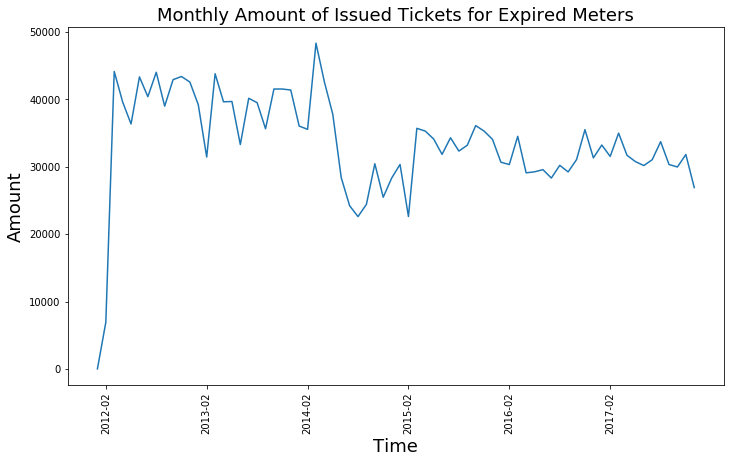

In [7]:
ax = numTickets.number.plot(xticks= numTickets.index[1:len(numTickets.index):12], rot=90, figsize=(10,6))
ax.set_xticklabels(numTickets.time[1:len(numTickets):12],rotation=90)
plt.tight_layout()
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amount',fontsize=18)
plt.title('Monthly Amount of Issued Tickets for Expired Meters', fontsize = 18)